# Diabetes Prediction By ML

- Goal :- In this project we will predict whether a person has diabetes or not?
  - Have diabetes ------> 1
  - Have not diabetes---> 0

### Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### loading the diabetes dataset to a pandas DataFrame

In [3]:
diabetes_dataset = pd.read_csv(r'A:\MTECH(Data Science)\DataSet\Diabetes\diabetes.csv')

### Variables/Column/Attributes Description :-

#### Pregnancies 
    - It is kind of test.
    - Gestational diabetes is a form of diabetes that occurs during pregnancy. 
    - It poses risks like preeclampsia, preterm labor, and increased chances of type 2 diabetes for both the pregnant person and child.
                  
#### Glucose 
   - A blood glucose test measures the level of glucose (sugar) in your blood
   - The amount of glucose in your bloodstream is called blood sugar or blood glucose. 
   - Your body regulates blood glucose levels with insulin, a hormone that pulls glucose from the bloodstream and into cells to be used for energy.
                                                                                                                                              
#### BloodPressure
   - Blood pressure is the force of the blood pushing against the artery walls.
   - Blood pressure target is usually below 140/90mmHg for people with diabetes or below 150/90mmHg if you are aged 80 years or above.

#### SkinThickness 
   - Skin thickening is frequently observed in patients with diabetes. 
   - Affected areas of skin can appear thickened, waxy, or edematous.
#### Insulin 
   - Insulin is a naturally occurring hormone produced by the pancreas.
   - It is essential for allowing your body to use sugar (glucose) for energy. 
   - If your pancreas doesn’t make enough insulin or your body doesn’t use insulin properly, it leads to high blood sugar levels (hyperglycemia), which results in diabetes.
   - Insulin therapy is often an important part of diabetes treatment, as it helps keep blood sugar under control and prevents diabetes complications.

#### BMI 
   - BMI stands for body mass index, which is a measure of your height compared to your weight.
   - BMI is a simple and inexpensive screening method for health risks, such as type 2 diabetes.
   - A high BMI indicates a high percentage of body fat, which can increase your risk for type 2 diabetes.
                                                                                        
#### DiabetesPedigreeFunction 
   - The Diabetes Pedigree Function (DPF) is a mathematical formula used to estimate the probability of an individual inheriting diabetes based on their family history.

#### Age 
   - Age of the person

#### Outcome 
    - This column will tell us whether there are dieties or not.
    - Have diabetes ------> 1
    - Have not diabetes---> 0


In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# printing the last 5 rows of the dataset
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [7]:
# This command will provide us all the basic information about the loaded DataFrame.
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Check Null Values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There is No any Null Values in Our Loaded DataSet

In [9]:
# This command is used to check duplicate values present or not in our dataSet.
diabetes_dataset.duplicated().sum()

0

- There is No any duplicate Values in Our Loaded DataSet

In [10]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Check diabetes by Outcomes column
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

<Axes: xlabel='Outcome', ylabel='count'>

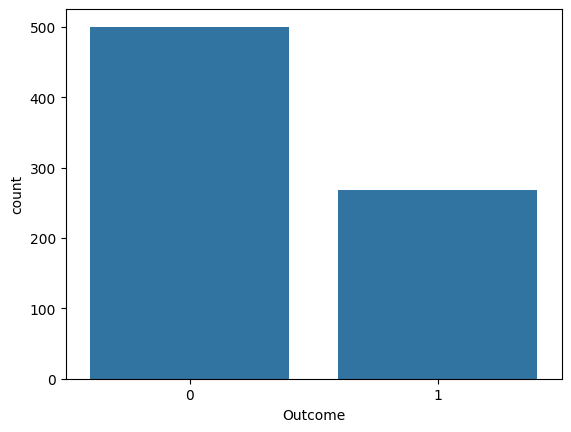

In [13]:
sns.countplot(x='Outcome', data = diabetes_dataset)

- From above graph we can say that approx 50% of person has diabetes

In [14]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
# X = Independent Variable
# Y = Dependent Variable

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization
  - Data Standardization is the process of converting data to a common format to enable users to process and analyze it.
  - Data Standardization is the process of converting data into Standard format that computer can easily understand and use.

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Split the Train and Test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the Model

In [26]:
classifier = svm.SVC(kernel='linear')

In [27]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation

#### Accuracy Score

In [28]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [30]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


## Making a Diadetes Predictive System

In [37]:
a= input('Enter the value of Pregnancies Level : ')
b= input('Enter the value of Glucose Level : ')
c= input('Enter the value of Blood_Pressure Level : ')
d= input('Enter the value of Skin_Thickness Level : ')
e= input('Enter the value of Insulin Level : ')
f= input('Enter the value of BMI Level : ')
g= input('Enter the value of Diabetes_Pedigree_Function Level : ')
h= input('Enter the value of Age Level : ')
#input_data = (5,166,72,19,175,25.8,0.587,51)
input_data = (a,b,c,d,e,f,g,h)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Enter the value of Pregnancies Level :  2
Enter the value of Glucose Level :  98
Enter the value of Blood_Pressure Level :  60
Enter the value of Skin_Thickness Level :  20
Enter the value of Insulin Level :  55
Enter the value of BMI Level :  30
Enter the value of Diabetes_Pedigree_Function Level :  1.20
Enter the value of Age Level :  25


[[-0.54791859 -0.71653347 -0.47073225 -0.03365099 -0.2153313  -0.25289651
   2.19901998 -0.70119842]]
[0]
The person is not diabetic


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **********************************************************************

## Name - Aatish Kumar Baitha
  - M.Tech(Data Science 2nd Year Student)
- My Linkedin Profile -
  - https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191
- My Blog
  - https://computersciencedatascience.blogspot.com/
- My Github Profile
  - https://github.com/Aatishkb

# Thank you!